In [1]:
# vim: set filetype=python:

# Variational Bayesian Linear Regression (Mean Field Approximation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from variational_lin_reg import VariationalLinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

### Coefficient Estimates: OLS vs Variational Bayesian Linear Regression

In case of multicollinearity variance of coefficients obtained using OLS is extremely high, so we generated highly correlated explanatory variables to see how Variational Linear Regression performs in this case.

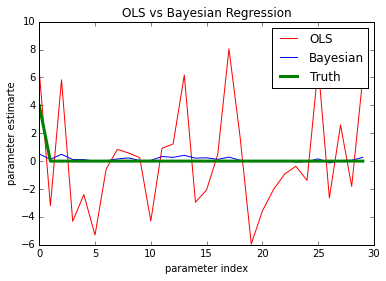

In [2]:
# generate features that will be highly correlated
np.random.seed(0)
n, m              = 100, 30
prototype         = 5*np.random.random(100)
X                 = np.outer(prototype,np.ones(m)) + 0.05*np.random.randn(n, m)

# Define only one feature to be relevant
Theta             = np.zeros(m)
Theta[0]          = 4.

# Generate linear model with noise
Y                 = np.dot(X, Theta) + np.random.normal(0,1,100)

# train & test split
X,x,Y,y           = train_test_split(X,Y, test_size = 0.4)

# Fit the Bayesian Regression and an OLS for comparison
br                = VariationalLinearRegression(X,Y, bias_term = True,
                                               verbose = False)
br.fit()

ols               = LinearRegression()
ols.fit(X, Y)

plt.plot(ols.coef_,"r-",label = "OLS")
plt.plot(br.Mw  ,"b-",label = "Bayesian")
plt.plot(Theta,"g-", label = "Truth", linewidth = 3)
plt.xlabel("parameter index")
plt.ylabel("parameter estimarte")
plt.title("OLS vs Bayesian Regression")
plt.legend(loc = 1)
plt.show()

As you can see parameter estimates of Bayesian Regression are not as volatile as estimates produced by OLS.

### Prediction Accuracy: OLS  vs  Variational Bayesian Linear Regression

In case of highly correlated features Variational Bayesian Linear Regression generally provides much better mean squared error on test set than OLS.

In [3]:
# Parameters: 
#                    n - number of observations
#                    m - number of features
#                    n_sims - number of simulations
n,m,n_sims = 500,499,100

# MSEs
mse_vlr, mse_ols       = [],[]


for i in range(n_sims):

    # generate dependent variable & highly correlated explanatory variables
    prototype = 5*np.random.random(n)
    X0        = np.outer(prototype,np.ones(m)) + 0.05*np.random.randn(n, m)
    Theta     = np.zeros(m)
    Theta[0]  = 4.
    Y0        = np.dot(X0, Theta) + np.random.normal(0,1,n)

    # split into training set and test set
    X,x,Y,y   = train_test_split(X0,Y0, test_size = 0.3, random_state = 0)

    # fit & test Variational Linear Regression
    vlr       = VariationalLinearRegression(X,Y,verbose = False,bias_term = True,
                                                                max_iter  = 100)
    vlr.fit()
    y_vlr,v_vlr = vlr.predict_dist(x)
    mse_vlr.append(mse(y_vlr,y))
    
    # fit & test OLS
    ols         = LinearRegression()
    ols.fit(X,Y)
    y_ols       = ols.predict(x)
    mse_ols.append(mse(y_ols,y))



In [4]:
print "Avergae MSE for Variational Regression on test set is {0}".format(np.mean(mse_vlr))
print "Average MSE for Ordinary Least Squares on test set is {0}".format(np.mean(mse_ols))

Avergae MSE for Variational Regression on test set is 1.05060805942
Average MSE for Ordinary Least Squares on test set is 3.3854696239


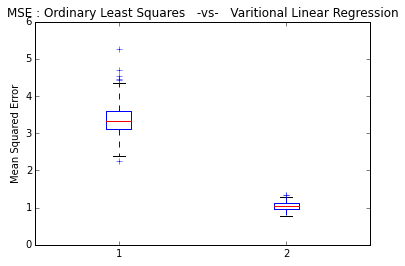

In [5]:
# compare mean squared error
bp1 = plt.boxplot((mse_ols,mse_vlr))
plt.title("MSE : Ordinary Least Squares   -vs-   Varitional Linear Regression")
plt.ylabel("Mean Squared Error")
plt.show()

### Predictive distribution

Bayesian Regression can provide not only point prediction but also predictive distribution.

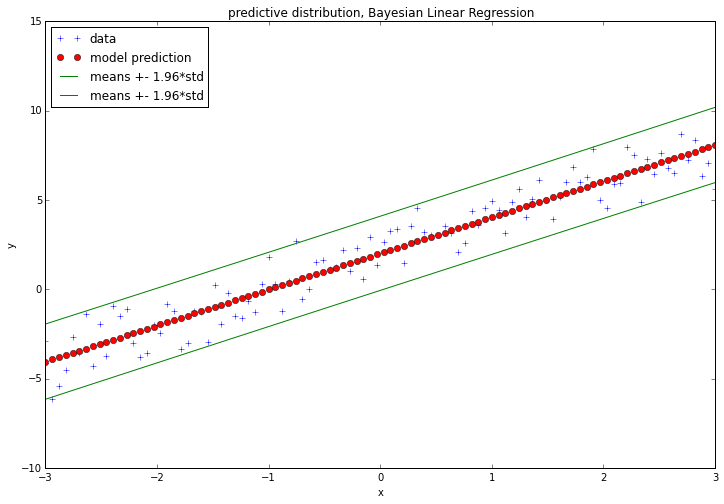

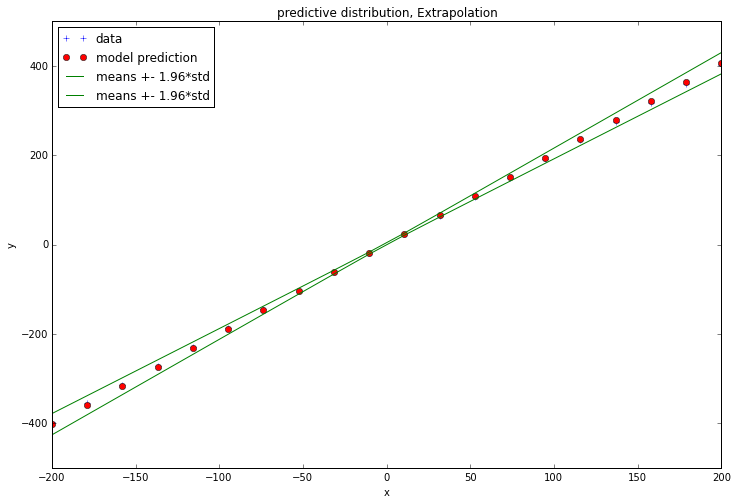

In [6]:
x           = np.zeros([100,1])
x[0:100,0]  = np.linspace(-3,3,100)
model       = lambda x: 2 + 2*x[:,0]
y           = model(x) + np.random.normal(0,1,100)
br2         = VariationalLinearRegression(x,y)
br2.fit()
x_test      = np.zeros([20,1])
x_test[:,0] = np.linspace(-200,200,20)
y_hat, var  = br2.predict_dist(x_test)
y_model     = model(x_test)


def simple_plotter(x,y, br = None, title = None):
    '''
    Plots mean and variance of predictive distribution
    '''
    if br is None:
       br = BayesianRegression(x,y)
    # predictive distribution
    y_hat, var = br.predict_dist(x)
    y_lo       = y_hat - 1.96*np.sqrt(var)
    y_hi       = y_hat + 1.96*np.sqrt(var)
    # plotting
    plt.figure(figsize = (12,8))
    plt.plot(x[:,0],y,"b+",label = 'data')
    plt.plot(x[:,0],y_hat,'ro', label = 'model prediction')
    plt.plot(x[:,0],y_lo,'g-', label = 'means +- 1.96*std')
    plt.plot(x[:,0],y_hi,'g-', label = 'means +- 1.96*std')    
    plt.legend(loc = 2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()
    return y_hat, var
    
    
y1,v1 = simple_plotter(x,y,br2,'predictive distribution, Bayesian Linear Regression')
y2,v2 = simple_plotter(x_test,y_model,br2,'predictive distribution, Extrapolation')

Note that in case of extrapolation prediction becomes more uncertain about areas that are further from training data [all training data are in in range [-3,3] ]. We provide plot of variance for predictive distribution below to illustrate this phenomenon

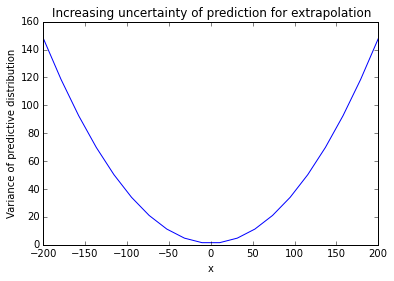

In [7]:
plt.plot(x_test[:,0],var)
plt.xlabel('x')
plt.ylabel('Variance of predictive distribution')
plt.title('Increasing uncertainty of prediction for extrapolation')
plt.show()